In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
# Load and read data
final_data=["Final_data/house_price.csv","Final_data/immigrants.csv","Final_data/mortgage_rates.csv"]
dfs=[pd.read_csv(f) for f in final_data]
dfs[0]

,Date,Composite_HPI_SA,Composite_Benchmark_SA
0,2005-01,100.0,221100
1,2005-02,100.6,222500
2,2005-03,101.4,224200
3,2005-04,102.2,225900
4,2005-05,102.8,227400
...,...,...,...
199,2021-08,326.5,721900
200,2021-09,333.9,738200
201,2021-10,343.5,759500
202,2021-11,351.4,777000


In [3]:
# Create final dataframe
final_df = pd.merge(pd.merge(dfs[0],dfs[1],on='Date'),dfs[2],on='Date')
final_df

,Date,Composite_HPI_SA,Composite_Benchmark_SA,Immigrants,Mortgage Rate
0,2005-01,100.0,221100,18812.666667,5.60
1,2005-02,100.6,222500,18812.666667,5.59
2,2005-03,101.4,224200,18812.666667,5.60
3,2005-04,102.2,225900,24823.666667,5.67
4,2005-05,102.8,227400,24823.666667,5.55
...,...,...,...,...,...
199,2021-08,326.5,721900,40970.333333,3.20
200,2021-09,333.9,738200,40970.333333,3.22
201,2021-10,343.5,759500,46063.333333,3.29
202,2021-11,351.4,777000,46063.333333,3.40


In [4]:
final_df=final_df.rename(columns={'Composite_HPI_SA':'HPI','Composite_Benchmark_SA':'Price'})

In [5]:
# Export final dataframe to csv file
final_df.to_csv("Final_data/FINALDB.csv",index=False)
final_df
    

,Date,HPI,Price,Immigrants,Mortgage Rate
0,2005-01,100.0,221100,18812.666667,5.60
1,2005-02,100.6,222500,18812.666667,5.59
2,2005-03,101.4,224200,18812.666667,5.60
3,2005-04,102.2,225900,24823.666667,5.67
4,2005-05,102.8,227400,24823.666667,5.55
...,...,...,...,...,...
199,2021-08,326.5,721900,40970.333333,3.20
200,2021-09,333.9,738200,40970.333333,3.22
201,2021-10,343.5,759500,46063.333333,3.29
202,2021-11,351.4,777000,46063.333333,3.40


In [6]:
final_df.dtypes

Date              object
HPI              float64
Price              int64
Immigrants       float64
Mortgage Rate    float64
dtype: object

In [7]:
final_df["Date"] = pd.to_datetime(final_df["Date"])
final_df['Date']=final_df['Date'].map(dt.datetime.toordinal)
final_df.dtypes

Date               int64
HPI              float64
Price              int64
Immigrants       float64
Mortgage Rate    float64
dtype: object

<AxesSubplot:>

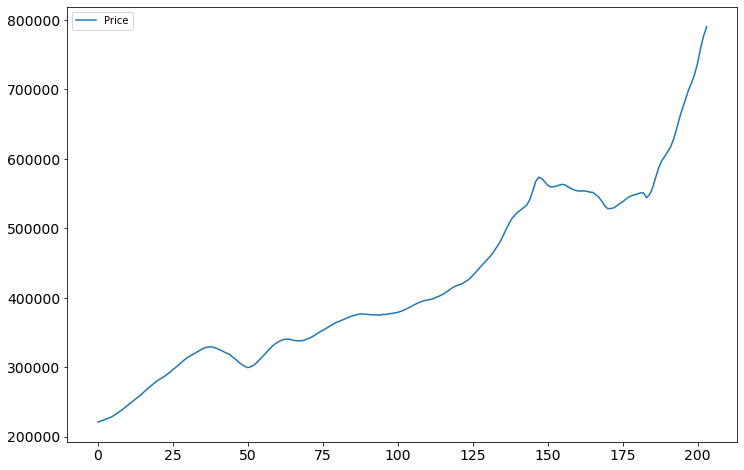

In [8]:
# Plot the price data
final_df.plot.line(figsize=(12,8),y="Price",fontsize=14)

# Linear Regression Model

In [9]:
# Create our features
X = final_df.drop("Price",axis=1)

# Create our target
y = final_df.Price

In [10]:
X.describe()

,Date,HPI,Immigrants,Mortgage Rate
count,204.000000,204.000000,204.000000,204.000000
mean,735035.343137,191.164706,22863.848039,4.588235
std,1796.859842,57.570588,5587.520594,0.951619
min,731947.000000,100.000000,11356.666667,3.200000
25%,733490.250000,147.025000,19091.166667,3.897500
50%,735035.000000,172.450000,22895.833333,4.325000
75%,736580.500000,244.850000,25148.166667,5.200000
max,738125.000000,357.500000,46063.333333,6.810000


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(153, 4)

In [12]:
# Create the model by using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
# Fit the model to training data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [14]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9999997245357293
Testing Score: 0.9999997949140198


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

In [16]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 3896.645627053979
R-squared (R2): 0.9999997949140198


In [17]:
model.score(X_test, y_test)

0.9999997949140198

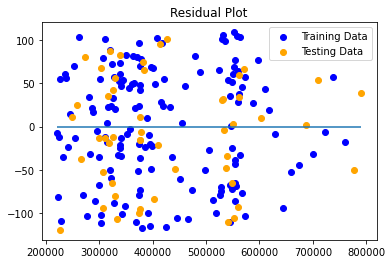

In [18]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()